## Presentación

Estos ejercicios tienen el fin de poder evaluar la situación en la que se encuentra cada unx de ustedes a esta altura de la materia. No es un examen, ni llevará ningún tipo de nota.

Les pedimos que respeten al pie de la letra el nombre de las funciones que les damos para completar y su "signature". Esto es, que respeten los argumentos de entrada y la salida. Esto es porque tenemos una forma de verificación automática que de otra manera no funciona. Cuando hayamos recibido los notebooks, haremos público el código de control.

Por supuesto, si quieren agregar celdas y más código, si quieren hacer pruebas para asegurarse de que el código funciona, etc., pueden hacerlo aquí mismo.

La _modalidad de entrega preferencial_ es a través de GitHub:
1. Hacer un fork del [repositorio](https://github.com/exord/UNSAM_IA), tocando el botón de arriba a la derecha (ver figura). 

2. Crear un subdirectorio dentro del directorio <tt>entregas</tt> con el formato "ApellidoNombre"
3. Completar este notebook y colocarlo en ese directorio. Hacer un "commit" y un "push" a su versión del repositorio.
4. Realizar un <tt>pull request</tt> desde GitHub y seguir las instrucciones. Más información en la [página de GitHub](https://help.github.com/en/github/collaborating-with-issues-and-pull-requests/about-pull-requests).

De ser necesario, en caso de sufrir de **alergia severa a GitHub**, el notebook puede enviarse por email.

La **fecha límite** para la entrega es el **martes 21 de abril a las 20 horas**.

<figure>
    <img src="figures/fork_pullrequest.jpeg", alt="Fork", width="800px", 
         style="float: left; margin-right: 10px;"/>
    
     <figcaption>Fig.1 - Ubicación de los botones para Fork y Pull request en Github.</figcaption>
</figure>

Entrega de Mariano Forti
====================

## 1. Probabilidad Condicional

In [1]:
#Si estas en Google Colab, ejecuta esta celda una unica vez:
!mkdir datasets
!mkdir datasets/student-alcohol-consumption
!wget https://raw.githubusercontent.com/exord/UNSAM_IA/master/datasets/student-alcohol-consumption/student-mat.csv
!mv student-mat.csv datasets/student-alcohol-consumption/student-mat.csv

mkdir: no se puede crear el directorio «datasets»: El fichero ya existe
mkdir: no se puede crear el directorio «datasets/student-alcohol-consumption»: El fichero ya existe
--2020-04-16 07:58:04--  https://raw.githubusercontent.com/exord/UNSAM_IA/master/datasets/student-alcohol-consumption/student-mat.csv
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.192.133, 151.101.0.133, 151.101.64.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[151.101.192.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 41983 (41K) [text/plain]
Grabando a: “student-mat.csv”

student-mat.csv     100%[===================>]  41.00K   160KB/s    en 0.3s    

2020-04-16 07:58:04 (160 KB/s) - “student-mat.csv” guardado [41983/41983]



Similar al ***Caso: Apruebo si falto a clase?*** del [notebook de probabilidad condicional](02_Condicional.ipynb), calcule la probabilidad de que un alumno haya faltado menos de 3 veces dado que sacó más de un 60% en la materia, i.e.
$$
P( \text{absences} < 3 | \text{G3} \geq 12).
$$

Por favor, utilice el siguiente signature. Se recomienda cambiar el código solamente entre los comentarios "Start" y "Finish". 
Si quiere probar cosas, siéntase libre de crear nuevas celdas de código, aunque estas no serán evaluadas.

me pide $ P( \text{absences} < 3 | \text{G3} \geq 12)$
donde $G3$ era la nota final 
es
$$ P( \text{absences} < 3 | \text{G3} \geq 12) = P(\text{faltapoco}|\text{buenanota})$$
$$ P(\text{faltapoco}|buenanota) = 
\frac{ P(\text{faltapoco} \cap \text{buenanota})}{P(\text{buenanota})}$$


In [14]:
import numpy as np
import pandas as pd

def prob_condicional(df=pd.read_csv('datasets/student-alcohol-consumption/student-mat.csv')):
    
    """Calcula P(absences < 3 | G3 >= 12).

    Input:
    df -- dataset de estudiantes

    Output:
    p        -- probabilidad de que absences > 3 dado que G3 >= 12
    """
    # Start
    #guarda el valor final, como un número, en esta variable
    # casi que copiando lo de la clase, armo columnas que cuenten los casos 
    # donde los criterios son true
    
    df['faltapoco']=np.where(df['absences']<3,1,0)
    df['buenanota']=np.where(df['G3']>=12,1,0)
    # de nuevo, agrego una columna de 'cuentas'
    df['cuenta']=1
    # y ahora hago una copia solo con las columnas que me interesan,
    interest = df[['faltapoco','buenanota','cuenta']]
    # que luego voy a pivotear para sumar los que cumplen cada criterio.
    # ojo, porque lo que pongo en 'index' y en 'column' tiene que ver con la proba que 
    # quiero calcular. 
    # lo que se pone en 'values' es el argumento de lo que usa con aggr, y es P(Index|columns)?
    pivot_interest = pd.pivot_table(
        interest,
        values = 'cuenta',
        index = 'buenanota',  #'buenanota',
        columns = 'faltapoco', #'faltapoco',
        aggfunc = np.sum,
        fill_value = 0 
    )
    # luego, no buena nota y no falta poco:
    nbnynfp = pivot_interest[0][0]
    # no buena nota y falta poco
    nbnytfp = pivot_interest[0][1]
    # buena nota y no falta poco 
    tbnynfp = pivot_interest[1][0]
    # buena nota y falta poco
    tbnytfp = pivot_interest[1][1]
    # total buena nota
    tbn = tbnytfp + tbnynfp
    # total falta poco
    tfp = tbnytfp + nbnytfp
    # luego, faltapoco dado que tiene buena nota, es
    # tfp_tbn = p(tfpytbn=tbnytfp)/p(tbn)
    total_casos = (nbnynfp+tbnytfp + tbnynfp + tbnytfp)
    resultado = tbnytfp / tbn
    print(probas)
    print('la proba de que falta poco dado que tiene buena nota es {:.4f}',format(res))
    #Finish
    
    return resultado

res = prob_condicional()

faltapoco    0    1
buenanota          
0          131  102
1           81   81
la proba de que falta poco dado que tiene buena nota es {:.4f} 0.4426229508196721


## 2. Inferencia Bayesiana

Se tira una moneda N veces, de las cuales X sale cara. La moneda sale cara con una frecuencia $\mu$ desconocida, pero que se cree que es *fair*. 

Construya una función que recibe el vector con los N resultados (1: cara, 0: seca) y con él calcule tanto el posterior del parámetro $\mu$ como la probabilidad de que $\mu>0.7$. Use como prior una distribución normal con media 0.5 y desviación estandar 0.1 ($\mathcal{N}(0.5,0.1)$)

Por favor, utilice el siguiente signature. Se recomienda cambiar el código solamente entre los comentarios "Start" y "Finish". 
Si quiere probar cosas, siéntase libre de crear nuevas celdas de código, aunque estas no serán evaluadas.

<b>Ayuda</b>: usar los métodos <tt>pdf</tt> y <tt>pmf</tt> de las clases de <tt>scipy.stats</tt> que se importan al principio de la celda. Revisar también los notebooks de [teoría](03_Inferencia.ipynb) y [práctica](03p_Inferencia_Soluciones.ipynb) que se presentaron en clase.

In [ ]:
import numpy as np
from scipy.stats import binom, norm

def inferencia_moneda(tiradas, seed=123):
    """Realiza inferencia bayesiana en el parametro mu de una moneda.

    Input:
    tiradas -- Resultado de N tiradas
    seed    -- Semilla para np.random (default=123)

    Output:
    p        -- probabilidad de que mu>0.7
    posterior-- posterior de mu, shape=(100,)
    """
    np.random.seed(seed)
    mu, step = np.linspace(0,1,num=100, retstep=True) #step es el espacio entre puntos
    #Numero de tiradas, y de veces que salio cara
    N=len(tiradas)
    X=np.sum(tiradas)
    
    #Start
    prior = norm.pdf(mu,0.5,0.1) #None #Esto es el prior evaluado en el vector mu
    # La verosimilitud para una tirada de monedas es una binomial
    verosimilitud = binom.pmf(X,N,mu) #None #La verosimilitud evaluada en el vector mu
    posterior = prior*verosimilitud #el posterior no normalizado
    # la evidencia normaliza al posterior:
    evidencia = posterior.sum()*step #None #evidencia o verosimilitud marginalizada
    posterior = posterior/evidencia #normalizamos para obtener el posterior
    #para obtener la proba de que mu > 0.7, tengo que integrar la posterior desde mu = 0.7 hasta 1

    p = posterior[mu>0.7].sum()*step # None #Probabilidad de que mu > 0.7 
    #Finish
    assert len(posterior) == len(mu), "Tamaño del posterior distinto al de mu"
    return p, np.array(posterior)

10 0.007315668668882223
20 0.0009649526089236185
30 0.0009692903617473166
40 5.050107506841654e-05
50 1.9823688717811693e-05
60 2.0782206590817728e-05
70 4.9795104954526834e-05
80 4.5089404394812614e-05
90 7.4720915480998595e-06
100 2.910155597039389e-06


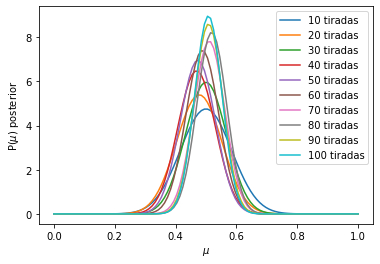

In [43]:
# voy a probar que onda
# voy a suponer true_mu =0.5 porque se cree que la moneda no esta trucada,pero tambien puedo  ver como va a cambiar
# la proba pedida si cambio true mu. se ve que salvo que true mu sea mayor que 0.7, p(mu>0.7 cae rápiramente.)
# seve que 
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
%matplotlib inline
truemu = 0.5
N = 100 # maximo numer de tiradas
tiradas = bernoulli.rvs(truemu,size=N)

Ns = np.linspace(10,N,10,dtype=int)
p = np.zeros(len(Ns))
for i in range(len(Ns)):
    n = Ns[i]
    p[i], Pos = inferencia_moneda(tiradas[:n])
    print( Ns[i],p[i])
    MU = np.linspace(0,1,len(Pos)) 
    thislabel='{:d} tiradas'.format(n)
    plt.plot(MU,Pos,label=thislabel)
plt.ylabel(r'P($\mu$) posterior')
plt.xlabel(r'$\mu$')
plt.legend()

Text(0.5, 0, 'tiradas')

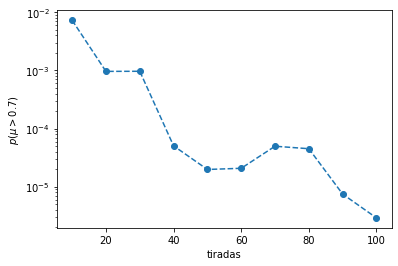

In [44]:
plt.figure()
plt.semilogy(Ns,p,'--o')
plt.ylabel('$p(\mu > 0.7)$')
plt.xlabel('tiradas')

## 3. Regresión Lineal

Construye una función que dado un input (X_train, Y_train) realice un ajuste lineal de cuadrados mínimos, y con ello devuelva las predicciones para el input X_test como un vector Y_test.

Por favor, utilice el siguiente signature. Se recomienda cambiar el código solamente entre los comentarios "Start" y "Finish". 
Si quiere probar cosas, siéntase libre de crear nuevas celdas de código, aunque estas no serán evaluadas.

<b>Ayuda</b>: pueden usar la implementación de las ecuaciones normales que aparece en el notebook de [modelos lineales](05_ModelosLineales.ipynb) o las clases del módulo <tt>sklearn.linear_model</tt>.

In [57]:
import numpy as np

def ajuste_lineal(X_train, Y_train, X_test):
    """Calcula un ajuste lineal.

    Input:
    X_train -- datos de entrenamiento, shape=(N,1)
    Y_train -- etiquetas de entrenamiento, shape=(N,1)
    X_test  -- datos de testeo, shape=(N_test,1)

    Output:
    Y_test  -- prediccion de etiquetas para X_test, shape=(N_test,1)
    """

    N=len(X_train)
    N_test=len(X_test)
    #Start
    # utilizo las funciones que hice en la guía, simplemente copio las lineas una a atras de la otra.
    phi = np.hstack((np.ones((N,1)),X_train.reshape((N,1))))
    WML = np.linalg.solve(phi.T.dot(phi) , phi.T.dot(Y_train)) 
    #ahora guardamos los resultados en esta variable
    Y_test = WML[0]+WML[1]*X_test
    #Finish
    assert len(Y_test) == len(X_test), "Tamaño de Y_test distinto al de X_test"
    return np.array(Y_test)

In [58]:
# voy  a tomarme la livertad de probar con una funcion lineal con error
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

xo = np.linspace(-1,1,100).astype(float)
truea = 1
trueb= 0
yo = trueb + truea*xo
# ya ahora un set the train:
Ntrain = 30
Ntest = 100
X = np.random.rand(Ntrain)*2-1
Y = trueb + truea*X + 0.2*norm.rvs(0,0.2,size=Ntrain)
X_t = np.random.rand(100)*2-1


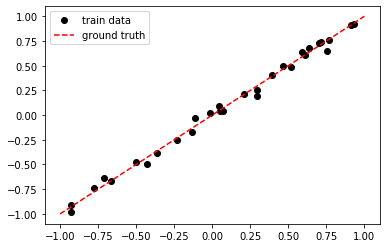

In [66]:
plt.plot(X,Y,'ok',label='train data')
plt.plot(xo,yo,'--r',label='ground truth')
plt.legend()
plt.show()

In [62]:
# ahora me hago otro de test:
X_t = np.random.rand(100)*2-1 
# y luego uso la función que arme arriba
Y_t = ajuste_lineal(X, Y, X_t)


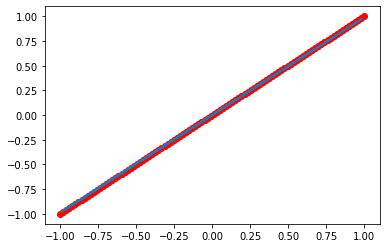

In [69]:
#a ver como quedó:

plt.plot(xo,yo,'or', label='ground truth')
plt.plot(X_t,Y_t,label='Predicción')